In [0]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub

In [0]:
train_data, test_data = tfds.load(name='imdb_reviews',
          split=['train','test'],
          batch_size=-1,
          as_supervised = True
          )

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteP0XOWK/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteP0XOWK/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteP0XOWK/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [0]:
train_reviews, train_labels = tfds.as_numpy(train_data)
test_reviews, test_labels = tfds.as_numpy(test_data)

In [0]:
display(train_reviews.shape)
train_labels.shape

(25000,)

(25000,)

In [0]:
train_reviews[-3:]

array([b'Okay. So I just got back. Before I start my review, let me tell you one thing: I wanted to like this movie. I know I\'ve been negative in the past, but I was hoping to be surprised and actually come out liking the film. I didn\'t.<br /><br />It\'s not just the fact that every horror clich\xc3\xa9 imaginable is in this. And it\'s not just the fact that they make every little thing into a jump scare (walking into a baseball bat left on the floor? Are you kidding me?). It just wasn\'t scary. One thing I was surprised about: there was more blood than I thought there was going to be.. which isn\'t saying much.<br /><br />The film starts off with Donna being dropped off by Lisa\'s mom at her house. She comes in.. goes upstairs. Camera pans to her father dead on the couch. Spooky. She goes upstairs, where the aforementioned baseball bat scene happens. Finds her brother on his bed, apparently dead (how could she tell? He didn\'t have a spot of blood on him). Killer comes in, Donna hid

In [0]:
train_labels[-3:]

array([0, 0, 1])

In [0]:
hub_layer = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1", 
                           output_shape=[],
                           input_shape=[], 
                           dtype=tf.string, 
                           trainable=True
                           )

model = tf.keras.models.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 128)               124642688 
_________________________________________________________________
dense (Dense)                (None, 16)                2064      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 124,644,897
Trainable params: 124,644,897
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
history = model.fit(train_reviews, train_labels, epochs=5, batch_size=1024, verbose=2, validation_split=0.2)

Epoch 1/5
20/20 - 32s - loss: 0.6552 - accuracy: 0.6313 - val_loss: 0.5881 - val_accuracy: 0.7522
Epoch 2/5
20/20 - 29s - loss: 0.5235 - accuracy: 0.7796 - val_loss: 0.4317 - val_accuracy: 0.8404
Epoch 3/5
20/20 - 30s - loss: 0.3816 - accuracy: 0.8594 - val_loss: 0.3383 - val_accuracy: 0.8662
Epoch 4/5
20/20 - 30s - loss: 0.2726 - accuracy: 0.9057 - val_loss: 0.2971 - val_accuracy: 0.8766
Epoch 5/5
20/20 - 27s - loss: 0.1977 - accuracy: 0.9372 - val_loss: 0.2870 - val_accuracy: 0.8844


In [0]:
model.evaluate(test_reviews, test_labels)

782/782 [==============================] - 134s 171ms/step - loss: 0.3082 - accuracy: 0.8699


[0.3081715703010559, 0.8698800206184387]

Let's try it on a review by David Sexton about the movie 'Silver Lining Playbook' assigning a 5/5 score

In [0]:
model.predict(['When I first saw this film at the Toronto Film Festival earlier this year, I  gave it four stars, perhaps a bit cagily. It went on to win the Audience Award there, a good one to get, voted for by actual paying cinema-goers. Seeing it a second time has made me love it even more, not always the case. For sure David O Russell  has a temper but that’s because he has a big heart all round. Go see.'])

array([[0.96389574]], dtype=float32)

In [0]:
model.predict_classes(x=['When I first saw this film at the Toronto Film Festival earlier this year, I  gave it four stars, perhaps a bit cagily. It went on to win the Audience Award there, a good one to get, voted for by actual paying cinema-goers. Seeing it a second time has made me love it even more, not always the case. For sure David O Russell  has a temper but that’s because he has a big heart all round. Go see.'])

array([[1]], dtype=int32)

The review is correctly classified as Positive.

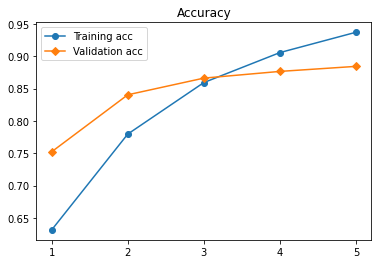

In [0]:
epochs = range(0, 5)
epochs_lab = range(1, 6)

plt.plot(history.history['accuracy'], label='Training acc', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation acc', marker='D')
plt.xticks(epochs, epochs_lab)
plt.title('Accuracy')
plt.legend()
plt.show()

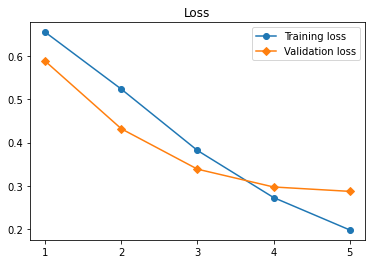

In [0]:
plt.plot(history.history['loss'], label='Training loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation loss', marker='D')
plt.xticks(epochs, epochs_lab)
plt.title('Loss')
plt.legend()
plt.show()